# AMANDA ATTIPOE - PYTHON CAPSTONE PROJECT 


## Dataset Summary

Primary tool: `insurance.csv`. The dataset is packed with information on health insurance customers.
Unseen data : `validation_dataset.csv`


## insurance.csv
| Column    | Data Type | Description                                                      |
|-----------|-----------|------------------------------------------------------------------|
| `age`       | int       | Age of the primary beneficiary.                                  |
| `sex`       | object    | Gender of the insurance contractor (male or female).             |
| `bmi`       | float     | Body mass index, a key indicator of body fat based on height and weight. |
| `children`  | int       | Number of dependents covered by the insurance plan.              |
| `smoker`    | object    | Indicates whether the beneficiary smokes (yes or no).            |
| `region`    | object    | The beneficiary's residential area in the US, divided into four regions. |
| `charges`   | float     | Individual medical costs billed by health insurance.             |

In [5]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Loading the insurance dataset
insurance_data_path = 'insurance.csv'
insurance = pd.read_csv(insurance_data_path)
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.924
1,18.0,male,33.770,1.0,no,Southeast,1725.5523
2,28.0,male,33.000,3.0,no,southeast,$4449.462
3,33.0,male,22.705,0.0,no,northwest,$21984.47061
4,32.0,male,28.880,0.0,no,northwest,$3866.8552


In [6]:
print(insurance.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1272 non-null   float64
 1   sex       1272 non-null   object 
 2   bmi       1272 non-null   float64
 3   children  1272 non-null   float64
 4   smoker    1272 non-null   object 
 5   region    1272 non-null   object 
 6   charges   1284 non-null   object 
dtypes: float64(3), object(4)
memory usage: 73.3+ KB
None


In [7]:
print(insurance.describe())

               age          bmi     children
count  1272.000000  1272.000000  1272.000000
mean     35.214623    30.560550     0.948899
std      22.478251     6.095573     1.303532
min     -64.000000    15.960000    -4.000000
25%      24.750000    26.180000     0.000000
50%      38.000000    30.210000     1.000000
75%      51.000000    34.485000     2.000000
max      64.000000    53.130000     5.000000


# DATA CLEANING

In [8]:
#Assigning the correct Data Types
# Handle non-finite values before converting to integer
insurance['age'] = pd.to_numeric(insurance['age'], errors='coerce').fillna(0).astype('int')
insurance['children'] = pd.to_numeric(insurance['children'], errors='coerce').fillna(0).astype('int')
insurance['bmi'] = pd.to_numeric(insurance['bmi'], errors='coerce').astype('float')

# Convert categorical variables to category type
insurance['sex'] = insurance['sex'].astype('category')
insurance['smoker'] = insurance['smoker'].astype('category')
insurance['region'] = insurance['region'].astype('category')

# Convert charges to float, handling any non-numeric values
insurance['charges'] = pd.to_numeric(insurance['charges'], errors='coerce')

In [9]:
#Checking newly assigned data types
insurance.dtypes

age            int32
sex         category
bmi          float64
children       int32
smoker      category
region      category
charges      float64
dtype: object

In [10]:
#Checking missing values
print(insurance.isna().sum().sort_values())

age           0
children      0
sex          66
bmi          66
smoker       66
region       66
charges     321
dtype: int64


In [11]:
insurance.shape

(1338, 7)

In [12]:
#Drop missing values
insurance = insurance.dropna()
print(insurance.isna().sum().sort_values())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [13]:
#Checking for discrepancies
print(insurance['sex'].unique())
print(insurance['smoker'].unique())
print(insurance['region'].unique())

['female', 'male', 'woman', 'F', 'man', 'M']
Categories (6, object): ['F', 'M', 'female', 'male', 'man', 'woman']
['yes', 'no']
Categories (2, object): ['no', 'yes']
['southwest', 'Southeast', 'southeast', 'Northwest', 'northwest', 'northeast', 'Southwest', 'Northeast']
Categories (8, object): ['Northeast', 'Northwest', 'Southeast', 'Southwest', 'northeast', 'northwest', 'southeast', 'southwest']


In [14]:
#Replacing incorrect values
insurance['sex'].replace({'F': 'female'}, inplace=True)
insurance['sex'].replace({'M': 'male'}, inplace=True)
insurance['sex'].replace({'woman': 'female'}, inplace=True)
insurance['sex'].replace({'man': 'male'}, inplace=True)
#setting region values to lowercase
insurance['region'] = insurance['region'].str.lower()

In [15]:
#Check again
print(insurance['sex'].unique())
print(insurance['smoker'].unique())
print(insurance['region'].unique())

['female', 'male']
Categories (2, object): ['female', 'male']
['yes', 'no']
Categories (2, object): ['no', 'yes']
['southwest' 'southeast' 'northwest' 'northeast']


# DATA CLEANING DOCUMENTATION

## Introduction
This report outlines the data cleaning processes I applied to the insurance dataset. 
The dataset contains the following columns: 'age', 'sex', 'bmi', 'children', 'smoker', 'region', and 'charges'. 
These steps were taken to ensure the data is clean, consistent, and ready for analysis.

### Data Cleaning Steps
#### Converting Data Types:
**Age:** I converted the age column to a numeric type to handle any non-numeric values, which were coerced to NaN. 
    These NaN values were then filled with 0, and the column was cast to an integer type. 
    This ensures that all values are valid and suitable for numerical analysis.
    
**Children:** Similarly, I converted the children column to a numeric type, with non-numeric values filled with 0. 
    The column was then cast to an integer type. This transformation ensures the integrity and validity of the data for 
    further analysis.
    
**BMI:** The bmi column was converted to a numeric type, with non-numeric values coerced to NaN and then cast to a float type. 
    This ensures that all BMI values are appropriate for statistical analysis.
    
#### Categorical Variables:

**Sex, Smoker, and Region:** I converted the categorical variables sex, smoker, and region to the category data type. 
    This not only optimizes memory usage but also ensures that these variables are correctly treated as categorical during
    exploratory data analysis (EDA) and machine learning.
    
#### Handling Charges:

**Charges:** I converted the charges column to a numeric type, handling any non-numeric values by coercing them to NaN. 
    Given that the rows containing NaN values accounted for less than 5% of the dataset, I decided to drop these rows. 
    This minimal data loss ensures that the remaining data is complete and valid for analysis.
    
#### Replacing Incorrect Values:

**Sex:** To ensure consistency and data validity, I standardized the values in the sex column. 
    For instance, I replaced 'F' and 'M' with 'female' and 'male' respectively, and any occurrences of 'woman' and 'man' 
    were also standardized to 'female' and 'male'.
    
**Region:** To maintain uniformity, I converted all values in the region column to lowercase. 
    This avoids discrepancies due to case sensitivity during analysis.
    
## Conclusion
By performing these data cleaning steps, I ensured that the insurance dataset is now free of non-numeric values in numeric 
columns, has consistent and valid categorical data, and is devoid of missing values. The transformations made the data 
appropriate for exploratory data analysis and ready for machine learning applications.


# EXPLORATORY DATA ANALYSIS

# Summary Statistics
This summary statistic below provides an overview of the distribution and central tendencies of the variables age, bmi, children,
and charges in the dataset. Here are some observations and interpretations:

1. **Count (Number of Observations):**
   - There are 964 observations (rows) in the dataset for each of the variables: age, bmi, children, and charges.

2. **Mean (Average):**
   - The mean age of individuals in the dataset is approximately 36.37 years.
   - The mean BMI (Body Mass Index) is around 30.63.
   - On average, individuals have close to 1 child (mean = 0.97).
   - The mean insurance charges are approximately $13,457.83.

3. **Standard Deviation (Variability):**
   - Age has a standard deviation of about 20.05 years, indicating a wide spread around the mean age.
   - BMI shows a standard deviation of approximately 6.14, suggesting variability in body weights among individuals.
   - The number of children has a standard deviation of around 1.29, implying variability in family sizes.
   - Charges have a large standard deviation of about $12,263.79, indicating significant variability in insurance costs 
    among individuals.

4. **Minimum and Maximum Values:**
   - The minimum age recorded is -56 years, which may indicate possible data entry errors or outliers that need further 
     investigation.
   - The minimum BMI is 15.96, which is within typical ranges but should be considered in context with other health 
     indicators.
   - The minimum number of children is -4, which is unusual and suggests potential data anomalies or outliers.
   - The minimum insurance charge is 1,135.94 dollars, indicating the lowest cost recorded in the dataset.
   - The maximum age recorded is 64 years, and the maximum BMI is 53.13, both within plausible ranges.
   - The maximum number of children is 5, reflecting the highest count in the dataset.
   - The maximum insurance charge recorded is 63,770.43 dollars, indicating the highest cost in the dataset.

5. **Percentiles (Distribution):**
   - The 25th percentile (Q1) represents the value below which 25% of the data falls.
   - The median (50th percentile or Q2) represents the midpoint of the data, with 50% falling below and 50% above this value.
   - The 75th percentile (Q3) represents the value below which 75% of the data falls.

6. **Interpretation:**
   - The dataset includes a diverse range of ages, BMI values, number of children, and insurance charges.
   - There are some anomalies such as negative values for age and children counts, which might require data cleaning or 
    further investigation.
   - The variability in insurance charges is substantial, indicating that factors beyond the variables listed 
     (such as pre-existing conditions, coverage types, etc.) may influence costs significantly.

Overall, these summary statistics provide a detailed snapshot of the dataset's distribution and characteristics, essential 
for understanding and preparing the data for further analysis or modeling tasks.

In [16]:
#Summary Statistics
print(insurance.describe())

              age         bmi    children       charges
count  964.000000  964.000000  964.000000    964.000000
mean    36.372407   30.630617    0.966805  13457.834805
std     20.047693    6.141206    1.289360  12263.790731
min    -56.000000   15.960000   -4.000000   1135.940700
25%     25.000000   26.378750    0.000000   4746.875675
50%     38.000000   30.300000    1.000000   9556.297050
75%     51.000000   34.580000    2.000000  17096.057220
max     64.000000   53.130000    5.000000  63770.428010


## Distribution of Charges

The histogram of charges below reveals a right-skewed distribution, indicating that most individuals 
incur lower medical expenses, with a smaller number of cases involving very high charges. The highest frequency of charges 
is between 0 and 10,000 dollars, and the frequency decreases as the charges increase. The data range extends from approximately 
0 to over 60,000 dollars, highlighting substantial variation in medical costs among the insured individuals. The Kernel Density 
Estimate (KDE) line further confirms the concentration of data points towards the lower end of the charge spectrum. 
This skewness suggests that while high medical expenses are relatively rare, they do occur within the dataset.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


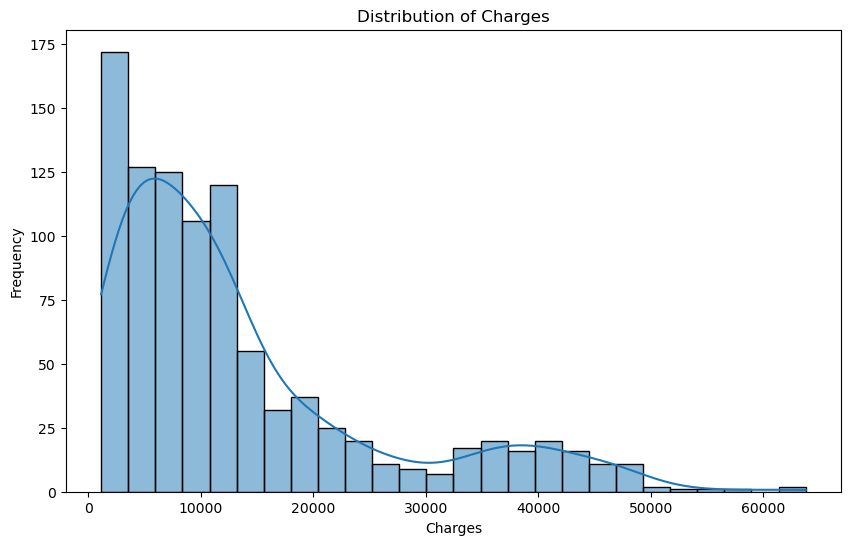

In [17]:
#Distribution of charges
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(insurance['charges'], kde=True)
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

## Charges vs Age
It was observed that the scatter plot of charges versus age revealed a positive correlation, indicating that medical charges
generally increase with age. The plot also displayed clear clusters, with younger individuals typically experiencing lower 
charges, while older individuals exhibited a wider range of charges, including higher expenses. 
However the plot shows some erroneous negative age values, which were standardized later as part of the preprocessing steps 
for machine learning, to ensure consistency and optimal performance of the models.

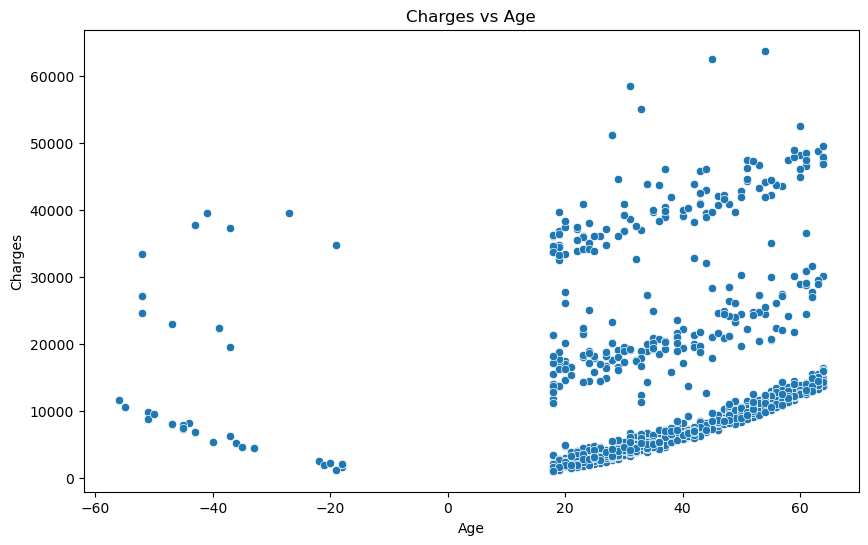

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', data=insurance)
plt.title('Charges vs Age')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

## Charges by Region
The box plot below visualizes insurance charges by region, showing the distribution of charges in the Southwest, Southeast,
Northwest, and Northeast regions. Here are the key observations:

#### Median Charges:

The median charges (the line inside each box) vary across regions.
The Southeast has the highest median charges.
The Southwest and Northwest have similar, lower median charges.
The Northeast has median charges slightly lower than the Southeast.

#### Interquartile Range (IQR):
The IQR (the height of each box) represents the middle 50% of the data.
The Southeast region has the widest IQR, indicating more variability in charges within this region.
The Southwest has the narrowest IQR, indicating less variability in charges.

#### Whiskers and Outliers:
The whiskers extend to 1.5 times the IQR or to the maximum/minimum data point within this range. Points outside this range
are considered outliers.
All regions have a significant number of outliers, especially at higher charge values.
The Southeast has the highest range of outliers, reaching up to around 60,000.
Other regions also have outliers, but they do not extend as high as in the Southeast.

#### Overall Distribution:
The Southeast has the highest overall charges and the most variability.
The Southwest, Northwest, and Northeast have lower overall charges, with the Southwest and Northwest showing less
variability than the Northeast.

#### Insights:
Individuals in the Southeast region tend to incur higher insurance charges compared to other regions.
The variability in charges is greatest in the Southeast and least in the Southwest.
Outliers in charges are present in all regions but are most extreme in the Southeast.
These observations indicate that region plays a significant role in determining insurance charges, with the Southeast 
standing out due to its higher and more variable charges.

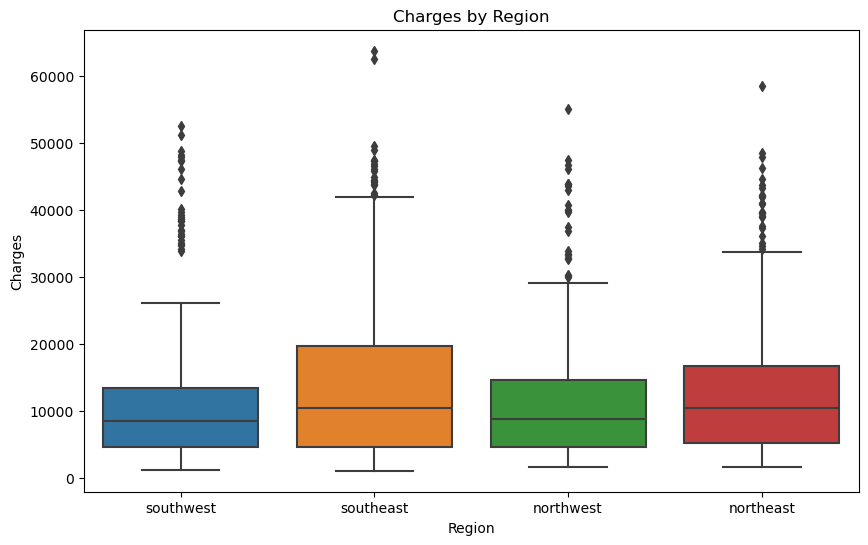

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='charges', data=insurance)
plt.title('Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()

## Charges by Smoking Status
The box plot below displays the distribution of charges by smoking status, with two groups: non-smokers ("no") and 
smokers ("yes"). Here are the key observations:

#### Median Charges:
Non-smokers have a lower median charge compared to smokers. The median is the line inside the box, indicating that half of 
the non-smokers have charges below this value, while half have charges above.
Smokers have a significantly higher median charge, indicating that smoking is associated with higher medical expenses.

#### Interquartile Range (IQR):
The box (IQR) represents the middle 50% of the data. Non-smokers have a narrower IQR compared to smokers, indicating less 
variability in charges among non-smokers. Smokers have a wider IQR, showing more variability in their charges.

#### Whiskers and Outliers:
The whiskers extend to 1.5 times the IQR from the quartiles, capturing the bulk of the data. Non-smokers have shorter 
whiskers, indicating fewer extreme values. Smokers have longer whiskers, suggesting more extreme values within this group.
Non-smokers have several outliers above the upper whisker, indicating some individuals incur significantly higher charges 
than the rest of the group.

#### Overall Comparison:
The plot clearly shows that smokers incur higher medical charges on average and have more variability in their charges 
compared to non-smokers. This box plot suggests a strong correlation between smoking status and medical charges, with 
smokers generally facing higher medical costs.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


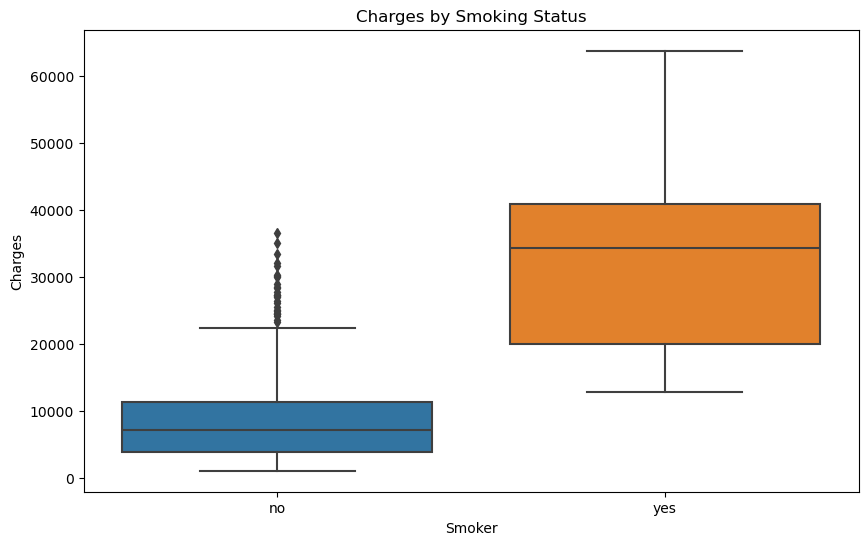

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=insurance)
plt.title('Charges by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

## Charges by Number of Children
The box plot below shows the distribution of charges by the number of children. Here are the key observations:

#### Median Charges:
The median charges (the line inside each box) vary slightly across the different numbers of children, but there is no clear
trend indicating that having more children leads to higher or lower median charges. The medians for 0, 1, and 2 children are
relatively similar, while families with 3 children have slightly higher median charges. Families with 4 or 5 children have
lower medians.

#### Interquartile Range (IQR):
The IQR, represented by the height of the boxes, shows variability within each group.
The groups with 0, 1, and 2 children have similar IQRs, indicating similar variability in charges.
Families with 3 children show a wider IQR, indicating more variability in charges.
Families with 4 and 5 children have narrower IQRs, suggesting less variability in charges.

#### Whiskers and Outliers:
The whiskers extend to 1.5 times the IQR from the quartiles, capturing most of the data points.
There are numerous outliers above the upper whisker for groups with 0, 1, 2, and 3 children, indicating some individuals in 
these groups incur significantly higher charges. Groups with 4 and 5 children have fewer outliers, suggesting fewer extreme
values in charges.

#### Overall Comparison:
While the median charges don't show a strong trend with the number of children, the variability and presence of outliers 
suggest that certain groups experience higher or more variable charges.
The presence of outliers in the groups with 0, 1, 2, and 3 children indicates that some families, regardless of the number 
of children, can incur high charges.
This plot indicates that the number of children does not have a straightforward relationship with medical charges, as the
medians are relatively stable across different numbers of children. However, variability and the presence of outliers 
suggest that other factors may influence the distribution of charges. 
Additionally,the plot shows some erroneous negative values, which were standardized later as part of the preprocessing steps 
for machine learning, to ensure consistency and optimal performance of the models

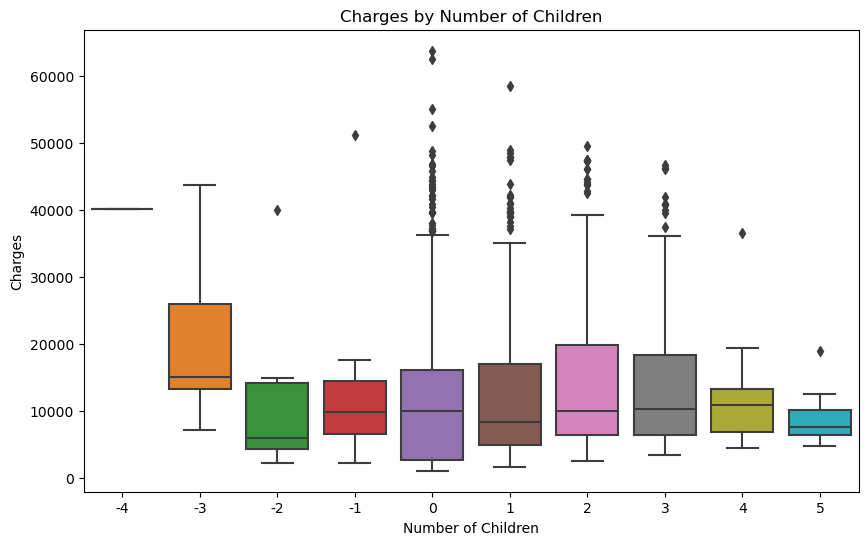

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='children', y='charges', data=insurance)
plt.title('Charges by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.show()

## BMI Distribution by Smoking Status 
This plot is a violin plot that visualizes the distribution of BMI by smoking status. Here are some observations from the 
plot:

#### Distribution Shape:
Both distributions (non-smokers in blue, smokers in orange) have a similar shape, indicating a comparable spread of BMI
values.The distributions are roughly symmetric around their medians.

#### Median and Quartiles:
The white dot in each violin represents the median BMI for each group.
The black bar in the center represents the interquartile range (IQR), indicating where the middle 50% of the data lies.

#### Range and Density:
Non-smokers show a slightly wider spread in BMI values compared to smokers, particularly in the lower and upper extremes.
Smokers tend to have a higher density around the median BMI, indicating that their BMIs are more concentrated around this 
value.

#### Outliers:
Both groups show some outliers, particularly on the higher end of the BMI spectrum.

#### Overall Trends:
There is no significant difference between the BMI distributions of smokers and non-smokers, as both groups have similar 
shapes and central tendencies.
Both groups have a peak around the same BMI range, suggesting similar BMI characteristics irrespective of smoking status.
This plot indicates that while there are differences in BMI values within each group, smoking status does not appear to 
significantly alter the overall distribution of BMI


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


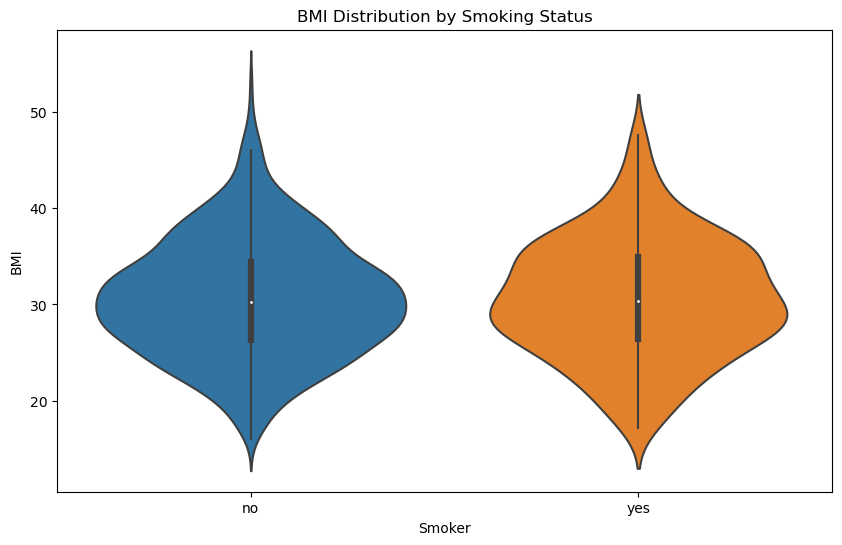

In [22]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='smoker', y='bmi', data=insurance)
plt.title('BMI Distribution by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('BMI')
plt.show()

## Age Distribution by Region
The box plot below shows the distribution of age by region (southwest, southeast, northwest, and northeast). 
Here are the key observations:

#### Median Age:
The median age (the line inside each box) is similar across all four regions, indicating that the central tendency of age is
consistent regardless of region.

#### Interquartile Range (IQR):
The IQR, represented by the height of the boxes, is also similar across all regions, suggesting comparable variability in 
ages within each region.

#### Whiskers and Outliers:
The whiskers extend to the minimum and maximum ages within 1.5 times the IQR from the quartiles.
There are several negative values shown as outliers in each region which were later
standardized for machine learning purposes.

#### Overall Comparison:
The age distribution appears to be quite uniform across different regions, with similar medians and ranges.

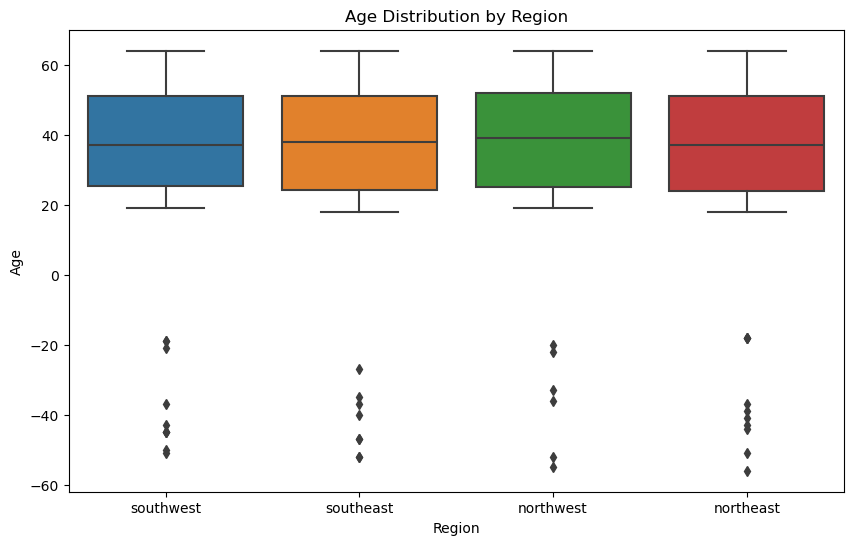

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='age', data=insurance)
plt.title('Age Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Age')
plt.show()

## Paiplot of Insurance Data
The pairplot below visualizes relationships between multiple variables in an insurance dataset. The variables include age, 
BMI, number of children, and insurance charges. The data points are colored based on the smoker status (blue for non-smokers
and orange for smokers). Here are some key observations:

#### Age vs. Charges:
There is a noticeable trend where older individuals tend to have higher insurance charges.
Smokers (orange) generally have higher charges than non-smokers (blue).

#### BMI vs. Charges:
Higher BMI values are associated with higher insurance charges.
Smokers with high BMI tend to have significantly higher charges compared to non-smokers with similar BMI.

#### Children vs. Charges:
There doesn't seem to be a clear trend between the number of children and insurance charges.
Smokers still appear to have higher charges irrespective of the number of children.

#### Age vs. BMI:
There doesn't seem to be a strong correlation between age and BMI.
Both smokers and non-smokers are fairly evenly distributed across different ages and BMI values.

#### Age vs. Children:
There isn't a strong relationship between age and the number of children.
Both smokers and non-smokers have a similar distribution in terms of age and number of children.

#### BMI vs. Children:
No clear trend between BMI and the number of children.
Distribution of smokers and non-smokers is fairly even across different numbers of children and BMI values.

#### Density Plots:
The density plots on the diagonal provide insights into the distribution of each variable.
- Age shows a right-skewed distribution.
- BMI shows a normal distribution.
- Number of children appears to be categorical, with peaks at certain values.
- Insurance charges show a right-skewed distribution, with a higher density for non-smokers at lower charges and a noticeable density for smokers at higher charges.

Overall, smoking status appears to be a significant factor influencing insurance charges, with smokers generally incurring 
higher costs. Age and BMI also influence charges, with older age and higher BMI associated with higher charges. However, 
the number of children does not show a clear impact on insurance charges.
Again, negative values in the dataset, were standardized later as part of the preprocessing steps for machine learning, to ensure consistency and optimal performance of the models

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and 

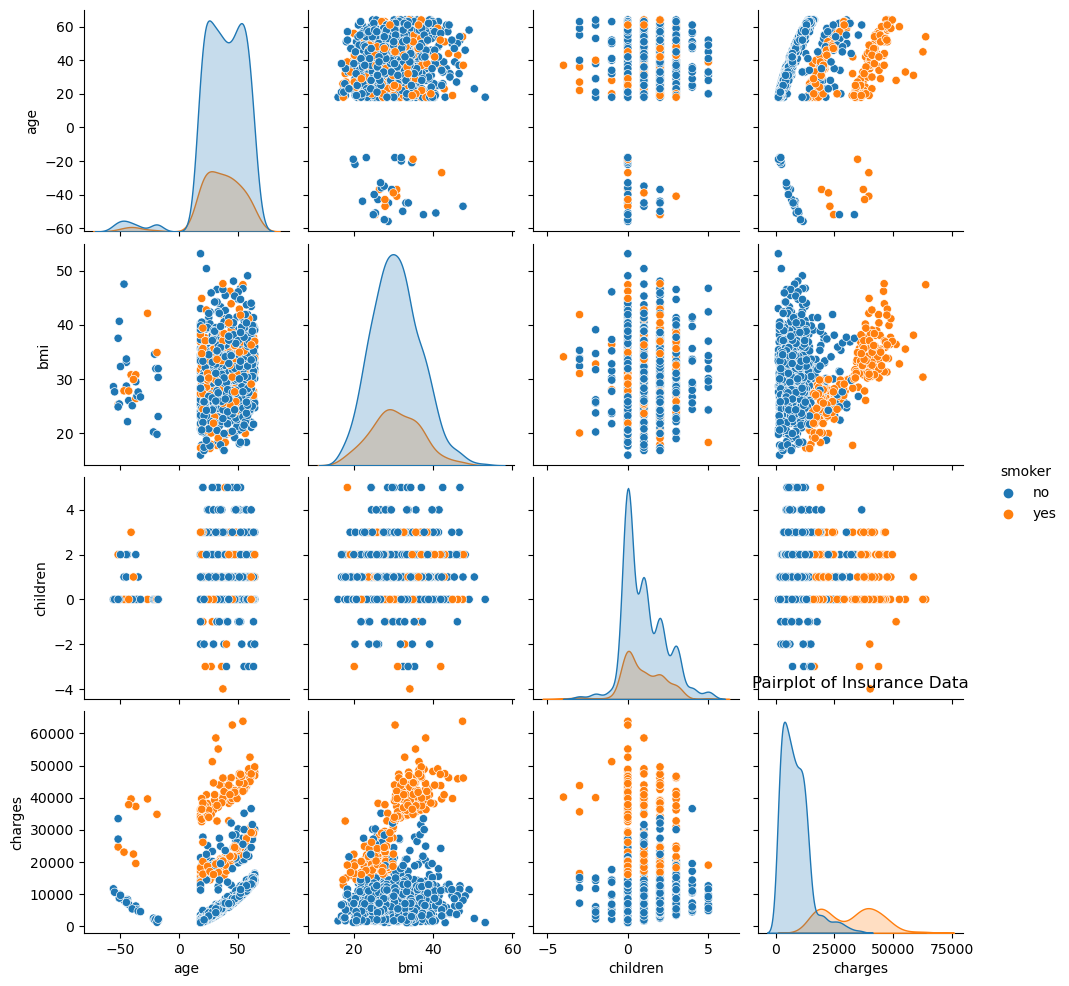

In [24]:
sns.pairplot(insurance, hue='smoker')
plt.title('Pairplot of Insurance Data')
plt.show()

# Supervised Machine Learning

## Objective
The objective of this project is to train a linear regression model to predict insurance charges using a new dataset. 
The dataset includes features such as age, sex, BMI, number of children, smoker status, and region.

## Tasks

1. **Encoding Categorical Values:**
   - Categorical variables like sex and region need to be encoded into numerical values suitable for machine learning models.

2. **Splitting Data:**
   - Split the dataset into training and testing sets to evaluate the model's performance.

3. **Standardizing Data:**
   - Standardize or scale the numerical features (age, BMI, number of children) to ensure they have a mean of 0 and a 
   standard deviation of 1. This step normalizes the data and prevents negative values from affecting the model.

4. **Training the Model:**
   - Train a linear regression model using the standardized training data.

5. **Testing Accuracy:**
   - Evaluate the model's accuracy on the test set to understand its performance.

6. **Applying the Model:**
   - Once trained and tested, apply the model to new data to predict insurance charges based on the provided features.

## Steps

#### Step 1: Encoding Categorical Values
Use techniques like one-hot encoding or label encoding to convert categorical variables (sex, smoker status, and region) 
into numerical format suitable for machine learning algorithms.

#### Step 2: Splitting Data
Split the dataset into training and testing sets, typically using an 80-20 or 70-30 split, ensuring that the test set is 
representative of the overall dataset.

#### Step 3: Standardizing Data
Standardize the numerical features (age, BMI, number of children) using techniques like StandardScaler from scikit-learn 
to normalize the data and prepare it for training.

#### Step 4: Training the Model
Train a linear regression model using the training data. This involves fitting the model to learn the relationship between
the independent variables (features) and the dependent variable (insurance charges).

#### Step 5: Testing Accuracy
Evaluate the model's performance on the test set using R-squared metric to assess how well it predicts insurance charges 
on unseen data.

#### Step 6: Applying the Model
Once validated, apply the trained model to new data instances where insurance charges need to be predicted based on the 
provided features.

By following these steps systematically, we aim to develop a robust linear regression model that accurately predicts 
insurance charges based on relevant demographic and health-related attributes.


In [25]:
#Splitting data into features and target variables
X = insurance[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = insurance['charges']

In [26]:
#Encoding categorical variables in features variable
X_encoded = pd.get_dummies(X, drop_first=True)


In [27]:
#Split target and feature variables to test and training data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate and fit regression model
from sklearn.linear_model import LinearRegression
reg_mod = LinearRegression()
reg_mod.fit(X_train_scaled, y_train)

# Make predictions
y_pred = reg_mod.predict(X_test_scaled)

In [28]:
#Evaluating 
cv_scores = cross_val_score(reg_mod, X_encoded, y, scoring='r2')
print(cv_scores)
r2_score = np.mean(cv_scores)
print(r2_score)

[0.6925984  0.66607056 0.72171354 0.70195271 0.7082948 ]
0.6981260007313591


In [29]:
# Loading the validation dataset
validation_data_path = 'validation_dataset.csv'
validation_dataset = pd.read_csv(validation_data_path)
validation_dataset.head()

,age,sex,bmi,children,smoker,region
0,18.0,female,24.090000,1.0,no,southeast
1,39.0,male,26.410000,0.0,yes,northeast
2,27.0,male,29.150000,0.0,yes,southeast
3,71.0,male,65.502135,13.0,yes,southeast
4,28.0,male,38.060000,0.0,no,southeast


In [30]:
#Checking validation dataset
validation_dataset.dtypes

age         float64
sex          object
bmi         float64
children    float64
smoker       object
region       object
dtype: object

In [31]:
#Cleaning Validation data set
# Assigning the correct Data Types
# Handle non-finite values before converting to integer

validation_dataset['age'] = pd.to_numeric(validation_dataset['age'], errors='coerce').fillna(0).astype('int')
validation_dataset['children'] = pd.to_numeric(validation_dataset['children'], errors='coerce').fillna(0).astype('int')
validation_dataset['bmi'] = pd.to_numeric(validation_dataset['bmi'], errors='coerce').astype('float')

# Convert categorical variables to category type
validation_dataset['sex'] = validation_dataset['sex'].astype('category')
validation_dataset['smoker'] = validation_dataset['smoker'].astype('category')
validation_dataset['region'] = validation_dataset['region'].astype('category')


In [32]:
#Check Again
validation_dataset.dtypes

age            int32
sex         category
bmi          float64
children       int32
smoker      category
region      category
dtype: object

In [33]:
#Checking missing values in validation dataset
print(validation_dataset.isna().sum().sort_values())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64


In [34]:
#Encoding categorical values in validation dataset
validation_dataset_encoded = pd.get_dummies(validation_dataset, drop_first=True)

In [35]:
#Scaling validation dataset
validation_dataset_scaled = scaler.transform(validation_dataset_encoded)

In [36]:
#Predicting charges  
validation_pred = reg_mod.predict(validation_dataset_scaled)

In [37]:
# Handling negative predicted values by replacing them with the minimum basic charge (set at 1000)
min_basic_charge = 1000
validation_pred[validation_pred < min_basic_charge] = min_basic_charge

#Saving everything as a panda dataframe
validation_data = pd.DataFrame(validation_dataset_scaled)

# Add the predicted_charges column to the DataFrame
validation_data['predicted_charges'] = validation_pred
validation_data.head(30)
 


,0,1,2,3,4,5,6,7,predicted_charges
0,-0.927337,-1.087196,0.039710,-1.009121,-0.549877,-0.557875,1.608119,-0.547876,3053.581680
1,0.131739,-0.707972,-0.745333,0.990962,1.818588,-0.557875,-0.621845,-0.547876,30737.782195
2,-0.473448,-0.260095,-0.745333,0.990962,1.818588,-0.557875,1.608119,-0.547876,29556.796478
3,1.745568,5.681981,9.460234,0.990962,1.818588,-0.557875,1.608119,-0.547876,53785.048472
4,-0.423015,1.196323,-0.745333,0.990962,-0.549877,-0.557875,1.608119,-0.547876,9459.798061
5,1.695136,6.900765,7.890147,-1.009121,1.818588,-0.557875,1.608119,-0.547876,56527.957143
6,-0.372583,0.223743,0.824754,-1.009121,-0.549877,1.792516,-0.621845,-0.547876,8370.573986
7,0.283035,1.730016,0.039710,-1.009121,-0.549877,-0.557875,-0.621845,-0.547876,14000.577746
8,0.585628,0.953587,-0.745333,-1.009121,-0.549877,1.792516,-0.621845,-0.547876,12153.074416
9,1.342111,0.477105,1.609798,0.990962,-0.549877,-0.557875,1.608119,-0.547876,13073.396310


In [38]:
# Save the modified validation dataset to a new CSV file if needed
validation_data.to_csv('validation_data_with_predictions.csv', index=False)